# **Importing presets and libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

df = pd.read_csv("../input/spacex-launches-data/SpaceX_Launches_Data.csv")
print(df)

print(df.info())

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


    FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9   6123.547647   LEO  CCSFS SLC 40   
1              2  2012-05-22       Falcon 9    525.000000   LEO  CCSFS SLC 40   
2              3  2013-03-01       Falcon 9    677.000000   ISS  CCSFS SLC 40   
3              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9   3170.000000   GTO  CCSFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86  2020-09-03       Falcon 9  15600.000000  VLEO    KSC LC 39A   
86            87  2020-10-06       Falcon 9  15600.000000  VLEO    KSC LC 39A   
87            88  2020-10-18       Falcon 9  15600.000000  VLEO    KSC LC 39A   
88            89  2020-10-24       Falcon 9  15600.000000  VLEO  CCSFS SLC 40   
89            90  2020-11-05       Falcon 9   3681.000000   MEO  CCSFS SLC 40   

        Outcome  Flights  G

In [2]:
print(list(np.unique(df["PayloadMass"])))

[350.0, 475.0, 500.0, 525.0, 553.0, 570.0, 677.0, 1316.0, 1425.0, 1600.0, 1898.0, 1977.0, 2034.0, 2205.0, 2216.0, 2227.7, 2257.0, 2296.0, 2395.0, 2410.0, 2477.0, 2482.0, 2490.0, 2573.0, 2708.0, 2760.0, 2800.0, 2910.0, 3000.0, 3100.0, 3136.0, 3170.0, 3325.0, 3669.0, 3681.0, 3700.0, 3750.0, 3880.0, 4000.0, 4230.0, 4400.0, 4428.0, 4535.0, 4600.0, 4696.0, 4707.0, 4990.0, 5000.0, 5200.0, 5271.0, 5300.0, 5383.85, 5500.0, 5600.0, 5800.0, 6070.0, 6092.0, 6123.547647058824, 6500.0, 6761.0, 6800.0, 7060.0, 7076.0, 9525.0, 9600.0, 12259.0, 13200.0, 15600.0]


# **Launch Site Locations**

<AxesSubplot:>

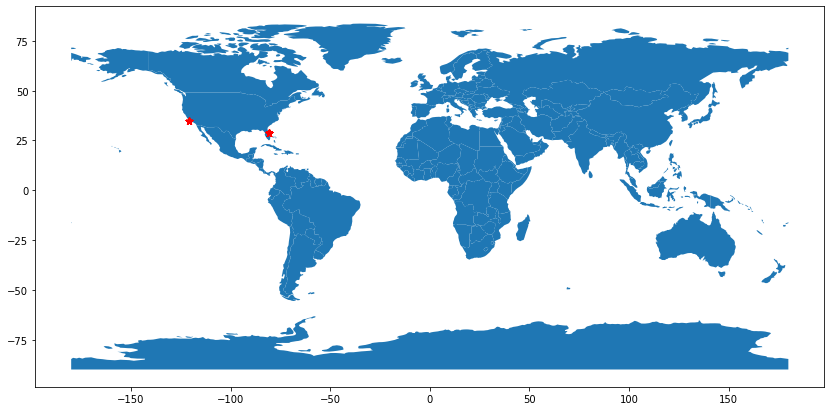

In [3]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 7)), marker='*', color='red', markersize=50)

# **Correlation heatmap of data**

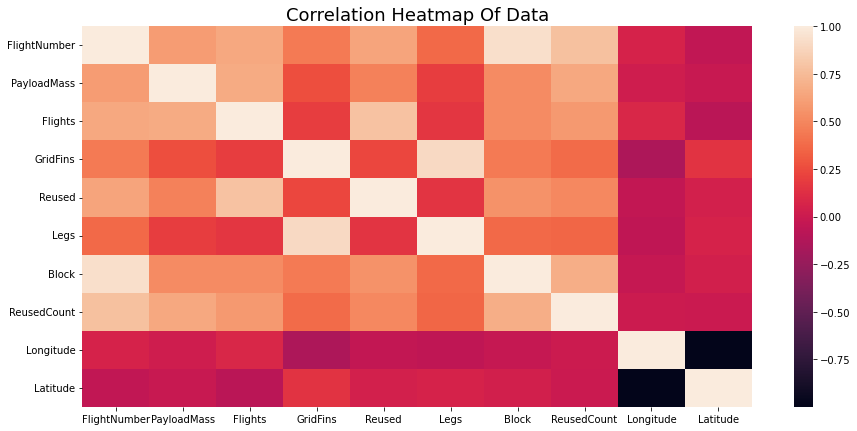

In [4]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Correlation heatmap of data".title(),fontsize=18)
sns.heatmap(df.corr())
plt.show()

# **Histogram chart of tasks by orbits**

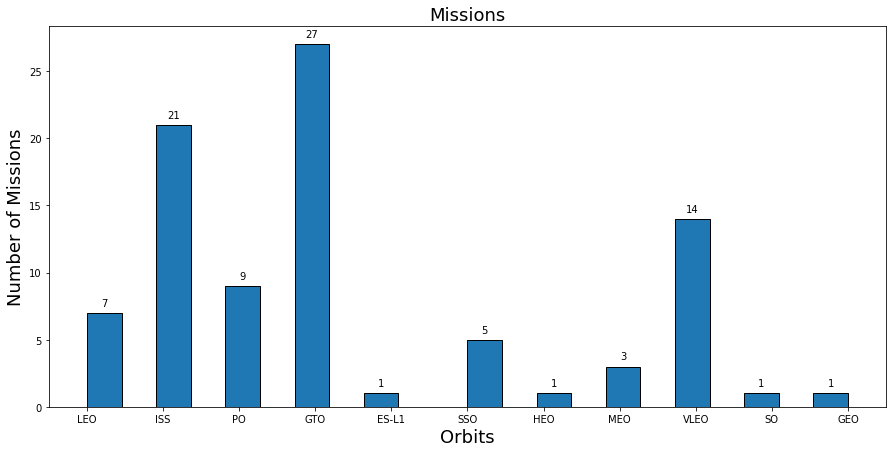

In [5]:
def addlabels():
    for rect in ax.patches:
        height = rect.get_height()
        if height == 0:
            pass
        else:
            ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                            xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(15, 7))
orbits = list(np.unique(df["Orbit"]))
plt.hist(df["Orbit"],bins = 2*len(orbits),edgecolor="Black",facecolor = "tab:blue")
addlabels()
plt.title("Missions",fontsize=18)
plt.xlabel("Orbits",fontsize=18)
plt.ylabel("Number of Missions",fontsize=18)        
plt.show()

# **Histogram chart of tasks by Launch Site**

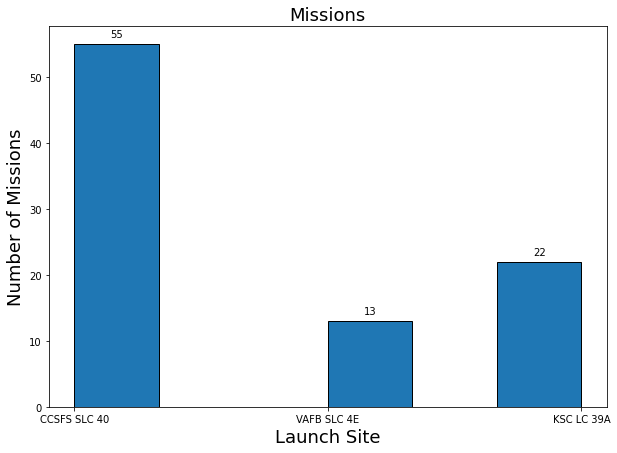

In [6]:
fig, ax = plt.subplots(figsize=(10, 7))
orbits = list(np.unique(df["LaunchSite"]))
plt.hist(df["LaunchSite"],bins = 2*len(orbits),edgecolor="Black",facecolor = "tab:blue")
addlabels()
plt.title("Missions",fontsize=18)
plt.xlabel("Launch Site",fontsize=18)
plt.ylabel("Number of Missions",fontsize=18)        
plt.show()

# **Graph of payload mass values according to the number of flights**

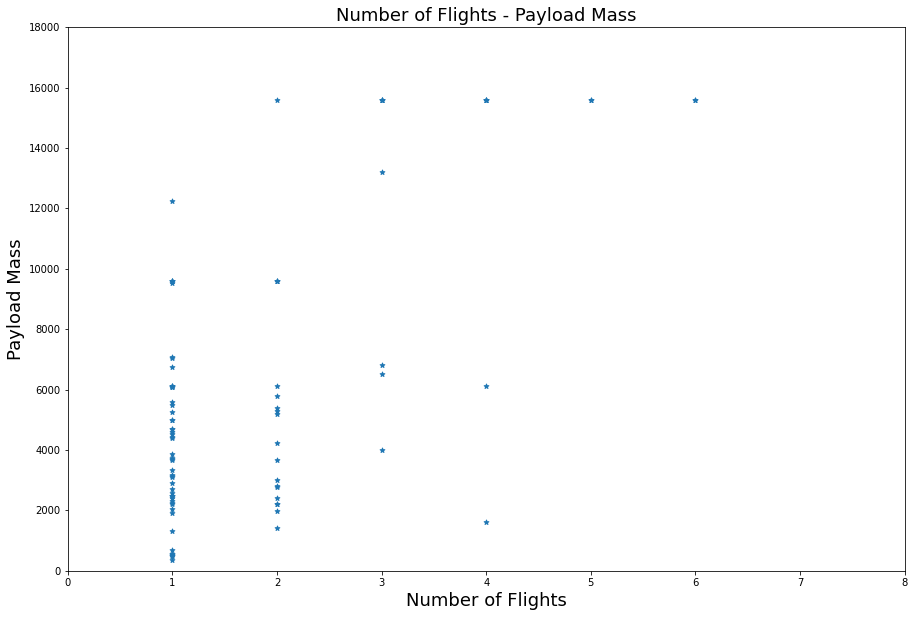

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(df["Flights"],df["PayloadMass"],marker = "*", s = 25)
plt.xlim(0,8);plt.ylim(0,18000)
plt.title("Number of Flights - Payload Mass",fontsize = 18)
plt.xlabel("Number of Flights",fontsize = 18)
plt.ylabel("Payload Mass",fontsize = 18)
plt.show()

# **Graph of Reused Count values according to Launch Site**

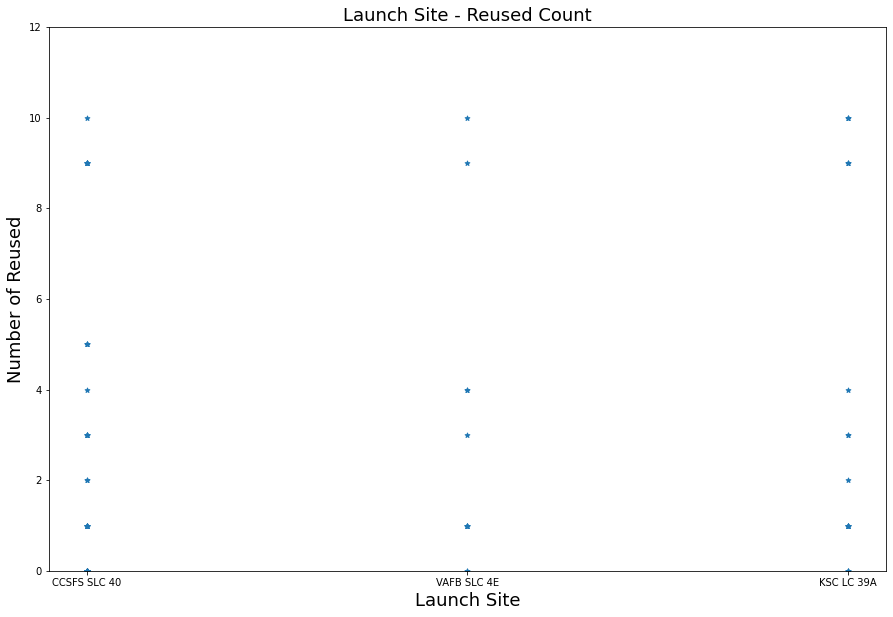

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(df["LaunchSite"],df["ReusedCount"],marker = "*", s = 25)
plt.ylim(0,12)
plt.title("Launch Site - Reused Count",fontsize = 18)
plt.xlabel("Launch Site",fontsize = 18)
plt.ylabel("Number of Reused",fontsize = 18)
plt.show()

# **Conclusions:**

* Rocket takeoffs took place over the eastern and western extremities of North America.

* Most missions to GTO orbit have been carried out. Then ISS and VLEO follow.

* The CCSFS SLC 40 facilities are where the most rocket launches take place.

* Smaller Payload Mass values were seen to occur more flights. (The more mass, the more expenses).

* At most CCSFS SLC 40 rockets were reused.